In [7]:
import json
import pandas as pd
import numpy as np
import re
from time import time
import json
from scipy import stats
from scipy.interpolate import interp1d
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from keras import regularizers
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow import keras
from keras.models import Model
import keras_tuner as kt

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure

In [11]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [12]:
#read eeg data.
df = pd.read_csv(r"C:\SY\7th\PROJECT\dataset\eeg-data.csv")
#read subject metadata.
df_2 = pd.read_csv(r"C:\SY\7th\PROJECT\dataset\subject-metadata.csv")
#drop uncessary columns.


In [13]:
#join the two data frames based on id column
df_outer = pd.merge(df, df_2, left_on='id', right_on='ID', how='outer') #here id is common column
#main dataset.
df_outer

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label,ID,Session,Seen video before?,Chosen color,Saw icons?,Gender,Wear contacts
0,3730,12,2015-05-09 23:13:42.281,1461,2015-05-09 16:13:40.954,0,0,"[944412.0, 111373.0, 52404.0, 28390.0, 3237.0,...","[-203.0, -202.0, -196.0, -185.0, -163.0, -137....",200,2015-05-09 23:13:39.550,2015-05-09 23:13:39.549+00,unlabeled,12,1,n,g,n,m,n
1,3732,12,2015-05-09 23:13:43.186,1461,2015-05-09 16:13:41.964,0,0,"[1793049.0, 89551.0, 3896.0, 21727.0, 9301.0, ...","[104.0, 134.0, 128.0, 121.0, 145.0, 151.0, 123...",200,2015-05-09 23:13:40.559,2015-05-09 23:13:40.559+00,unlabeled,12,1,n,g,n,m,n
2,3734,12,2015-05-09 23:13:44.392,1461,2015-05-09 16:13:42.950,0,0,"[400192.0, 640624.0, 153087.0, 69733.0, 98854....","[2002.0, 2047.0, 2047.0, 2047.0, 2047.0, 2047....",200,2015-05-09 23:13:41.549,2015-05-09 23:13:41.549+00,unlabeled,12,1,n,g,n,m,n
3,3735,12,2015-05-09 23:13:45.297,1461,2015-05-09 16:13:43.935,0,0,"[681192.0, 138630.0, 67891.0, 26459.0, 592240....","[1287.0, 1241.0, 1196.0, 1155.0, 1113.0, 1072....",200,2015-05-09 23:13:42.532,2015-05-09 23:13:42.532+00,unlabeled,12,1,n,g,n,m,n
4,3737,12,2015-05-09 23:13:46.201,1460,2015-05-09 16:13:44.936,0,0,"[268406.0, 197772.0, 190654.0, 266433.0, 91683...","[1905.0, 1836.0, 1770.0, 1707.0, 1645.0, 1587....",200,2015-05-09 23:13:43.532,2015-05-09 23:13:43.532+00,unlabeled,12,1,n,g,n,m,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30008,14646,21,2015-05-09 23:49:53.089,-35,2015-05-09 16:49:53.392,0,0,"[602911.0, 35536.0, 2999.0, 701.0, 1084.0, 100...","[68.0, 33.0, 20.0, 42.0, 67.0, 73.0, 54.0, 49....",200,2015-05-09 23:49:53.497,2015-05-09 23:49:53.497+00,unlabeled,21,2,y,b,n,m,n
30009,14645,21,2015-05-09 23:49:54.295,-35,2015-05-09 16:49:54.376,0,0,"[240035.0, 263319.0, 45673.0, 18828.0, 19444.0...","[217.0, 155.0, 53.0, -40.0, -92.0, -93.0, -56....",200,2015-05-09 23:49:54.474,2015-05-09 23:49:54.474+00,unlabeled,21,2,y,b,n,m,n
30010,14647,21,2015-05-09 23:49:55.202,-33,2015-05-09 16:49:55.361,0,0,"[1720214.0, 699084.0, 846718.0, 216725.0, 2527...","[-1668.0, -1606.0, -1545.0, -1486.0, -1430.0, ...",200,2015-05-09 23:49:55.458,2015-05-09 23:49:55.458+00,unlabeled,21,2,y,b,n,m,n
30011,14648,21,2015-05-09 23:49:56.112,-33,2015-05-09 16:49:56.359,0,0,"[1352406.0, 819938.0, 931827.0, 219559.0, 2114...","[-1639.0, -1399.0, -1186.0, -742.0, -189.0, 15...",200,2015-05-09 23:49:56.454,2015-05-09 23:49:56.454+00,unlabeled,21,2,y,b,n,m,n


In [14]:
print(df_outer.info())
df_outer.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30013 entries, 0 to 30012
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          30013 non-null  int64 
 1   id                  30013 non-null  int64 
 2   indra_time          30013 non-null  object
 3   browser_latency     30013 non-null  object
 4   reading_time        30013 non-null  object
 5   attention_esense    30013 non-null  int64 
 6   meditation_esense   30013 non-null  int64 
 7   eeg_power           30013 non-null  object
 8   raw_values          30013 non-null  object
 9   signal_quality      30013 non-null  int64 
 10  createdAt           30013 non-null  object
 11  updatedAt           30013 non-null  object
 12  label               30013 non-null  object
 13  ID                  30013 non-null  int64 
 14  Session             30013 non-null  int64 
 15  Seen video before?  30013 non-null  object
 16  Chosen color        30

,Unnamed: 0,id,attention_esense,meditation_esense,signal_quality,ID,Session
count,30013.000000,30013.000000,30013.000000,30013.000000,30013.000000,30013.000000,30013.000000
mean,15010.952521,13.685570,40.284710,46.638723,25.871856,13.685570,1.378736
std,8666.911131,8.479506,24.446432,26.153089,64.636640,8.479506,0.485080
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,7506.000000,6.000000,24.000000,34.000000,0.000000,6.000000,1.000000
50%,15010.000000,13.000000,43.000000,50.000000,0.000000,13.000000,1.000000
75%,22517.000000,20.000000,57.000000,64.000000,0.000000,20.000000,2.000000
max,30021.000000,30.000000,100.000000,100.000000,200.000000,30.000000,2.000000


In [15]:
df_outer = df_outer.loc[(df_outer['label'].str.contains('math[0-9]*', regex=True)) & (df_outer['label'] != 'mathInstruction') | (df_outer['label'] == 'relax')]
df_outer.label

1157      relax
1158      relax
1159      relax
1160      relax
1161      relax
          ...  
29705    math11
29706    math11
29707    math11
29708    math12
29709    math12
Name: label, Length: 1870, dtype: object

In [16]:
df_outer.loc[df_outer['label'].str.contains('math[0-9]*'), 'label'] = 'math'

In [17]:
df_outer.shape

(1870, 20)

In [18]:
if df_outer.duplicated().any()== True:
    print("There are duplicated values in this dataset")
else:
    print("There aren't duplicated values in this dataset")
#print the number of duplicated values.
print(f"There are {df_outer.duplicated().sum()} consistent duplicated values in this dataset.")

There aren't duplicated values in this dataset
There are 0 consistent duplicated values in this dataset.


In [19]:
if df.isna().values.any() == True:
    #this condidtion will be evaluated.
    print("There are missing values in this dataframe")
else:
    print("There aren't missing values in this dataframe")
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

There aren't missing values in this dataframe


,Total missing,% missing
Unnamed: 0,0,0.0
id,0,0.0
indra_time,0,0.0
browser_latency,0,0.0
reading_time,0,0.0
attention_esense,0,0.0
meditation_esense,0,0.0
eeg_power,0,0.0
raw_values,0,0.0
signal_quality,0,0.0


In [20]:
#convert egg_power features and raw data to list.
df_outer.eeg_power = df_outer.eeg_power.map(json.loads)
df_outer.raw_values = df_outer.raw_values.map(json.loads)

<Axes: title={'center': 'each label count'}, xlabel='label', ylabel='Freq'>

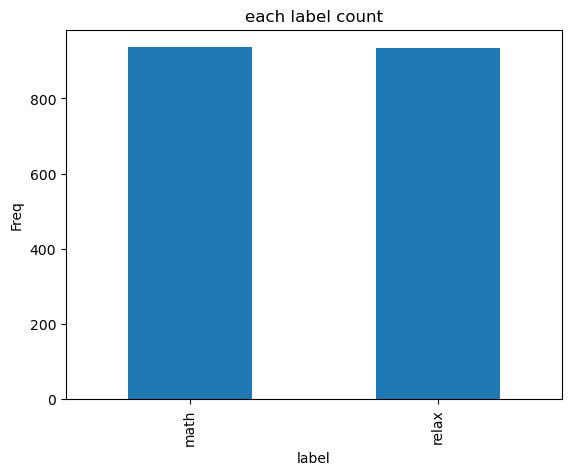

In [21]:
df_outer.label.value_counts().plot(kind='bar', title="each label count", xlabel="label", ylabel="Freq")

In [22]:
def plotPerColumnDistribution(df, n_rows, n_cols):
    """
    Plots the distribution of each numeric column in the DataFrame.
    Args:
    df: pandas DataFrame
    n_rows: Number of rows for subplots
    n_cols: Number of columns for subplots
    """
    # Filter only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(numeric_df.columns):
        if i < n_rows * n_cols:
            numeric_df[col].plot(kind='hist', bins=30, ax=axes[i], title=col)
            axes[i].set_xlabel(col)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming df1 is your DataFrame
# plotPerColumnDistribution(df1, 3, 4)  # Adjust the number of rows and columns


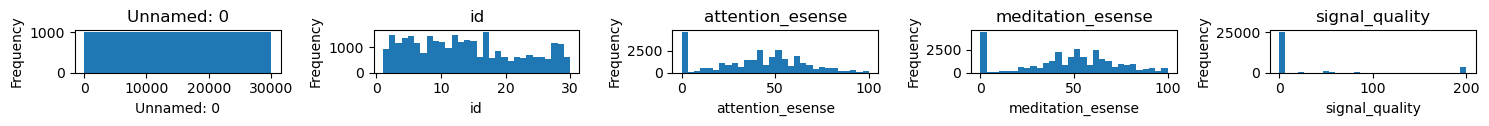

In [23]:
plotPerColumnDistribution(df, 10, 5)

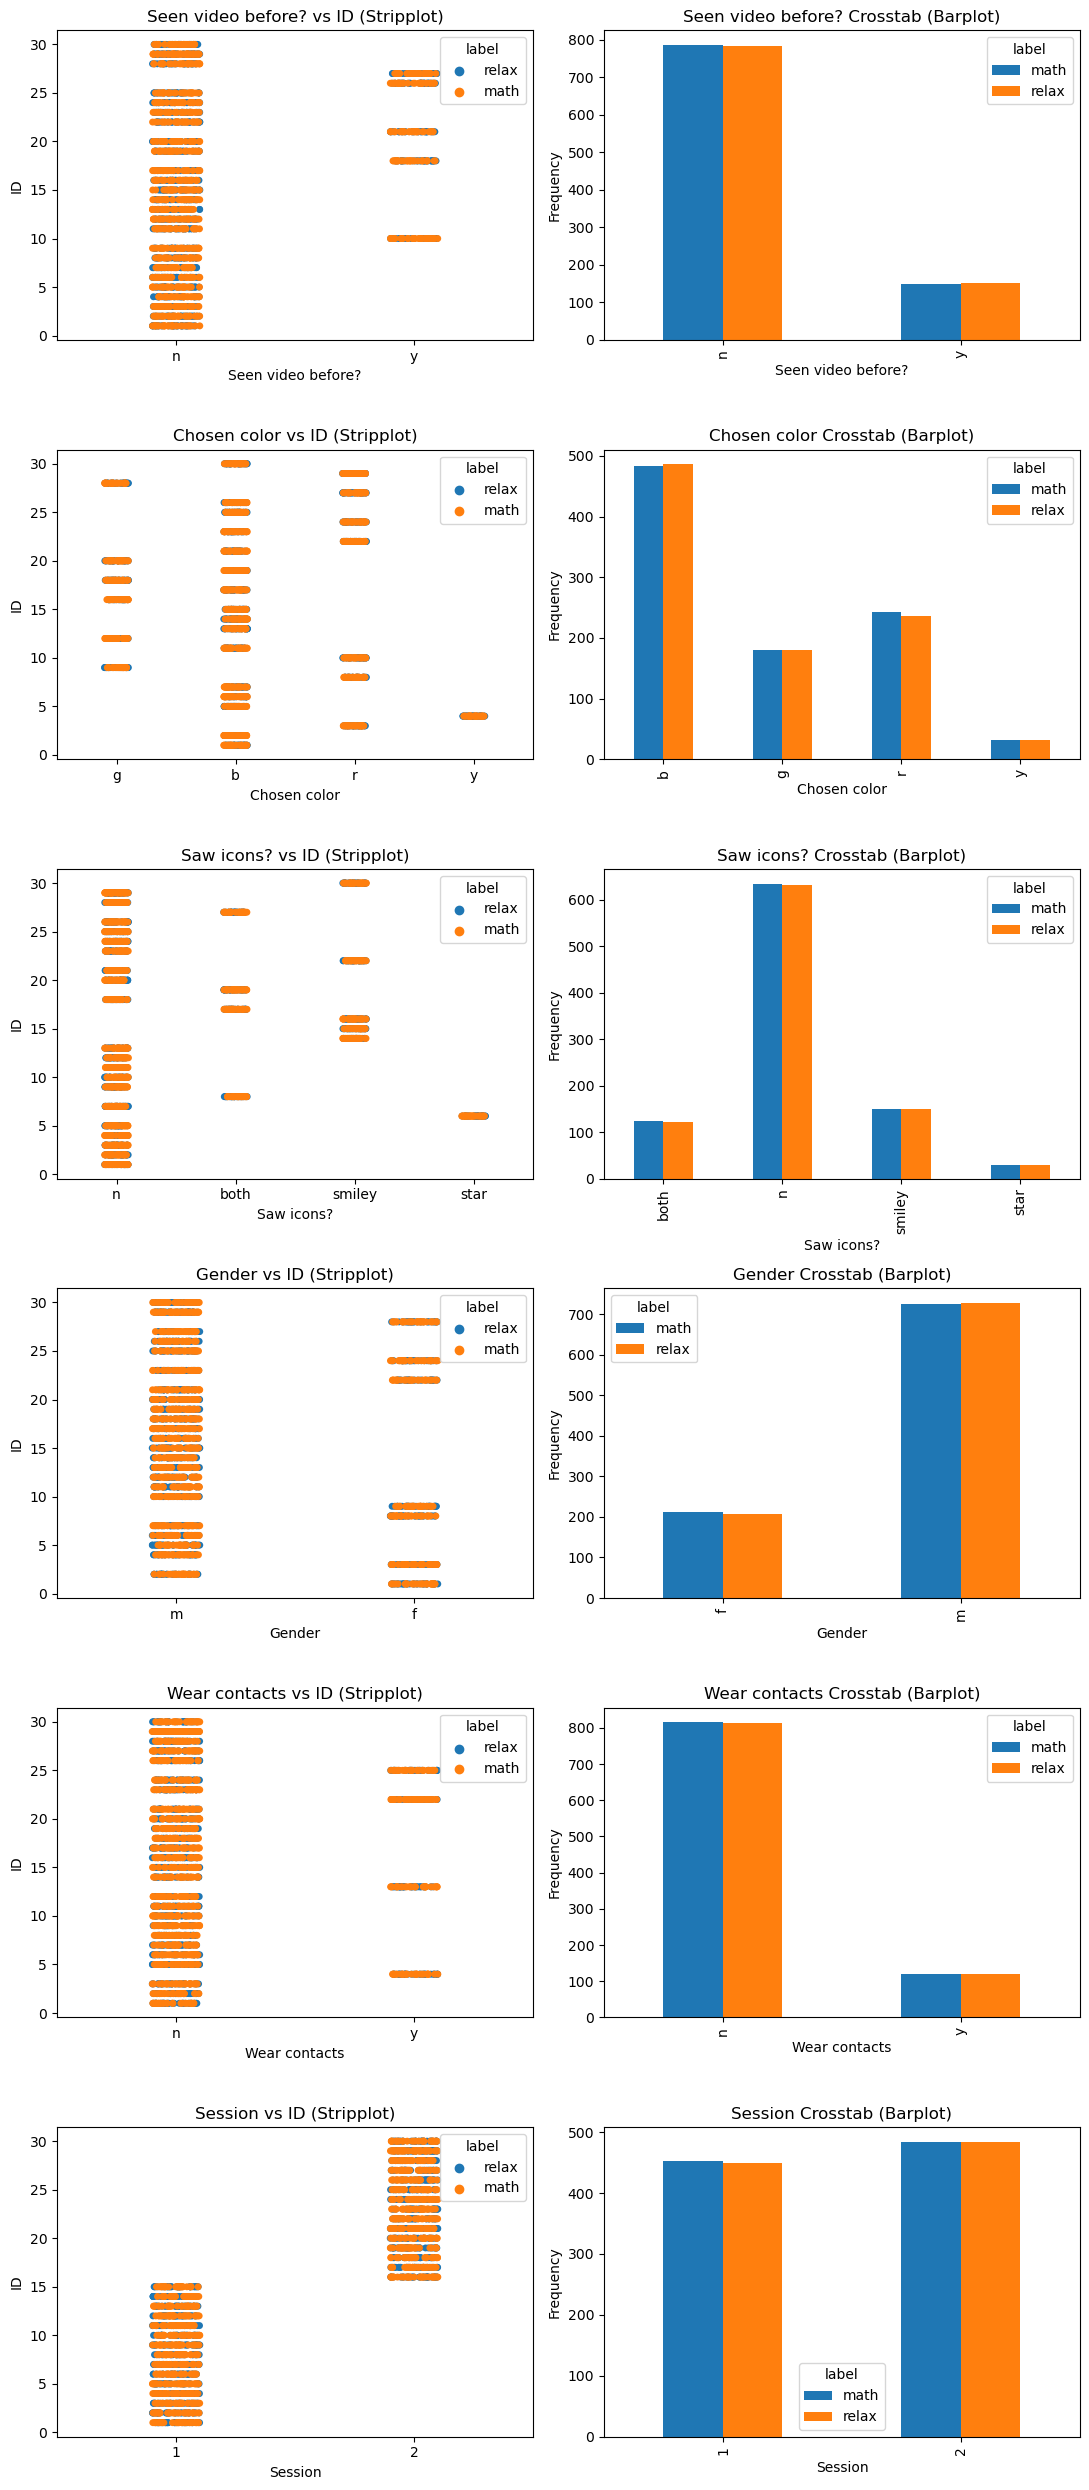

In [24]:
fig, axes = plt.subplots(6, 2, figsize=(11, 25))
axes = axes.flatten()

columns = [
    'Seen video before?', 'Chosen color', 'Saw icons?', 
    'Gender', 'Wear contacts', 'Session'
]

for i, col in enumerate(columns):
    # Stripplot
    sns.stripplot(data=df_outer, x=col, y='ID', hue='label', ax=axes[i*2])
    axes[i*2].set_title(f'{col} vs ID (Stripplot)')
    
    # Barplot (using crosstab)
    pd.crosstab(df_outer[col], df_outer['label']).plot(kind='bar', ylabel='Frequency', ax=axes[i*2+1])
    axes[i*2+1].set_title(f'{col} Crosstab (Barplot)')

plt.tight_layout()
plt.show()

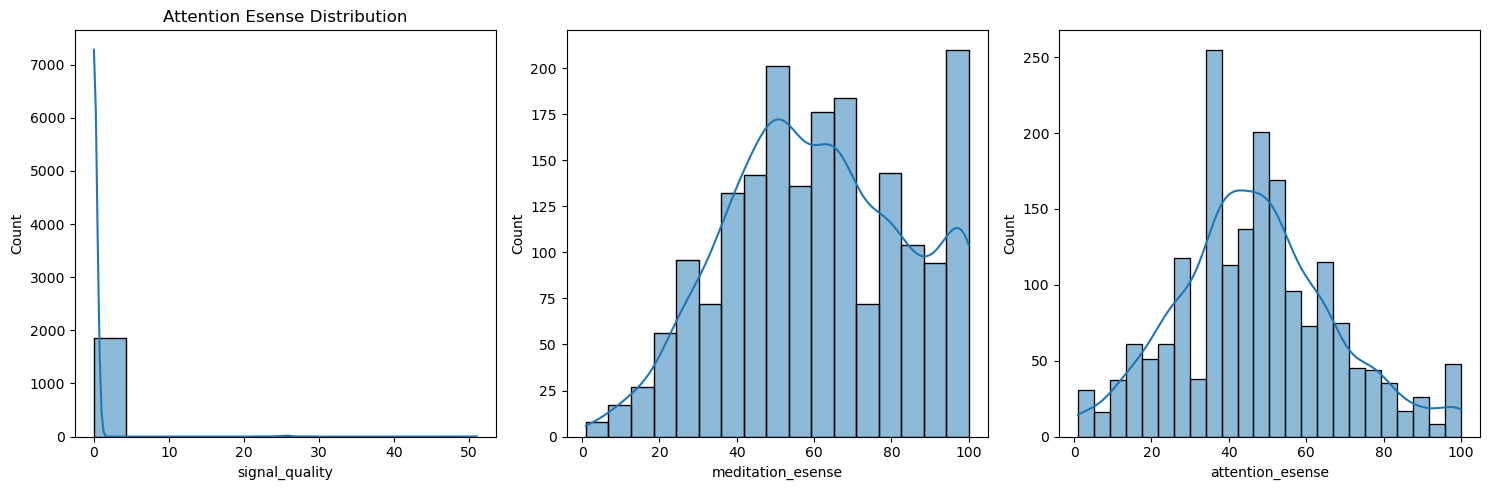

In [25]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(15,5))


#signal_quality
ax1.set_title("Signal Quality Distribution")
ax1.set_title("Meditaition Esense Distribution")
ax1.set_title("Attention Esense Distribution")

sns.histplot(data = df_outer, x = 'signal_quality', kde=True, ax = ax1)
sns.histplot(data = df_outer, x = 'meditation_esense', kde=True, ax = ax2)
sns.histplot(data = df_outer, x = 'attention_esense', kde=True, ax = ax3)
plt.tight_layout()

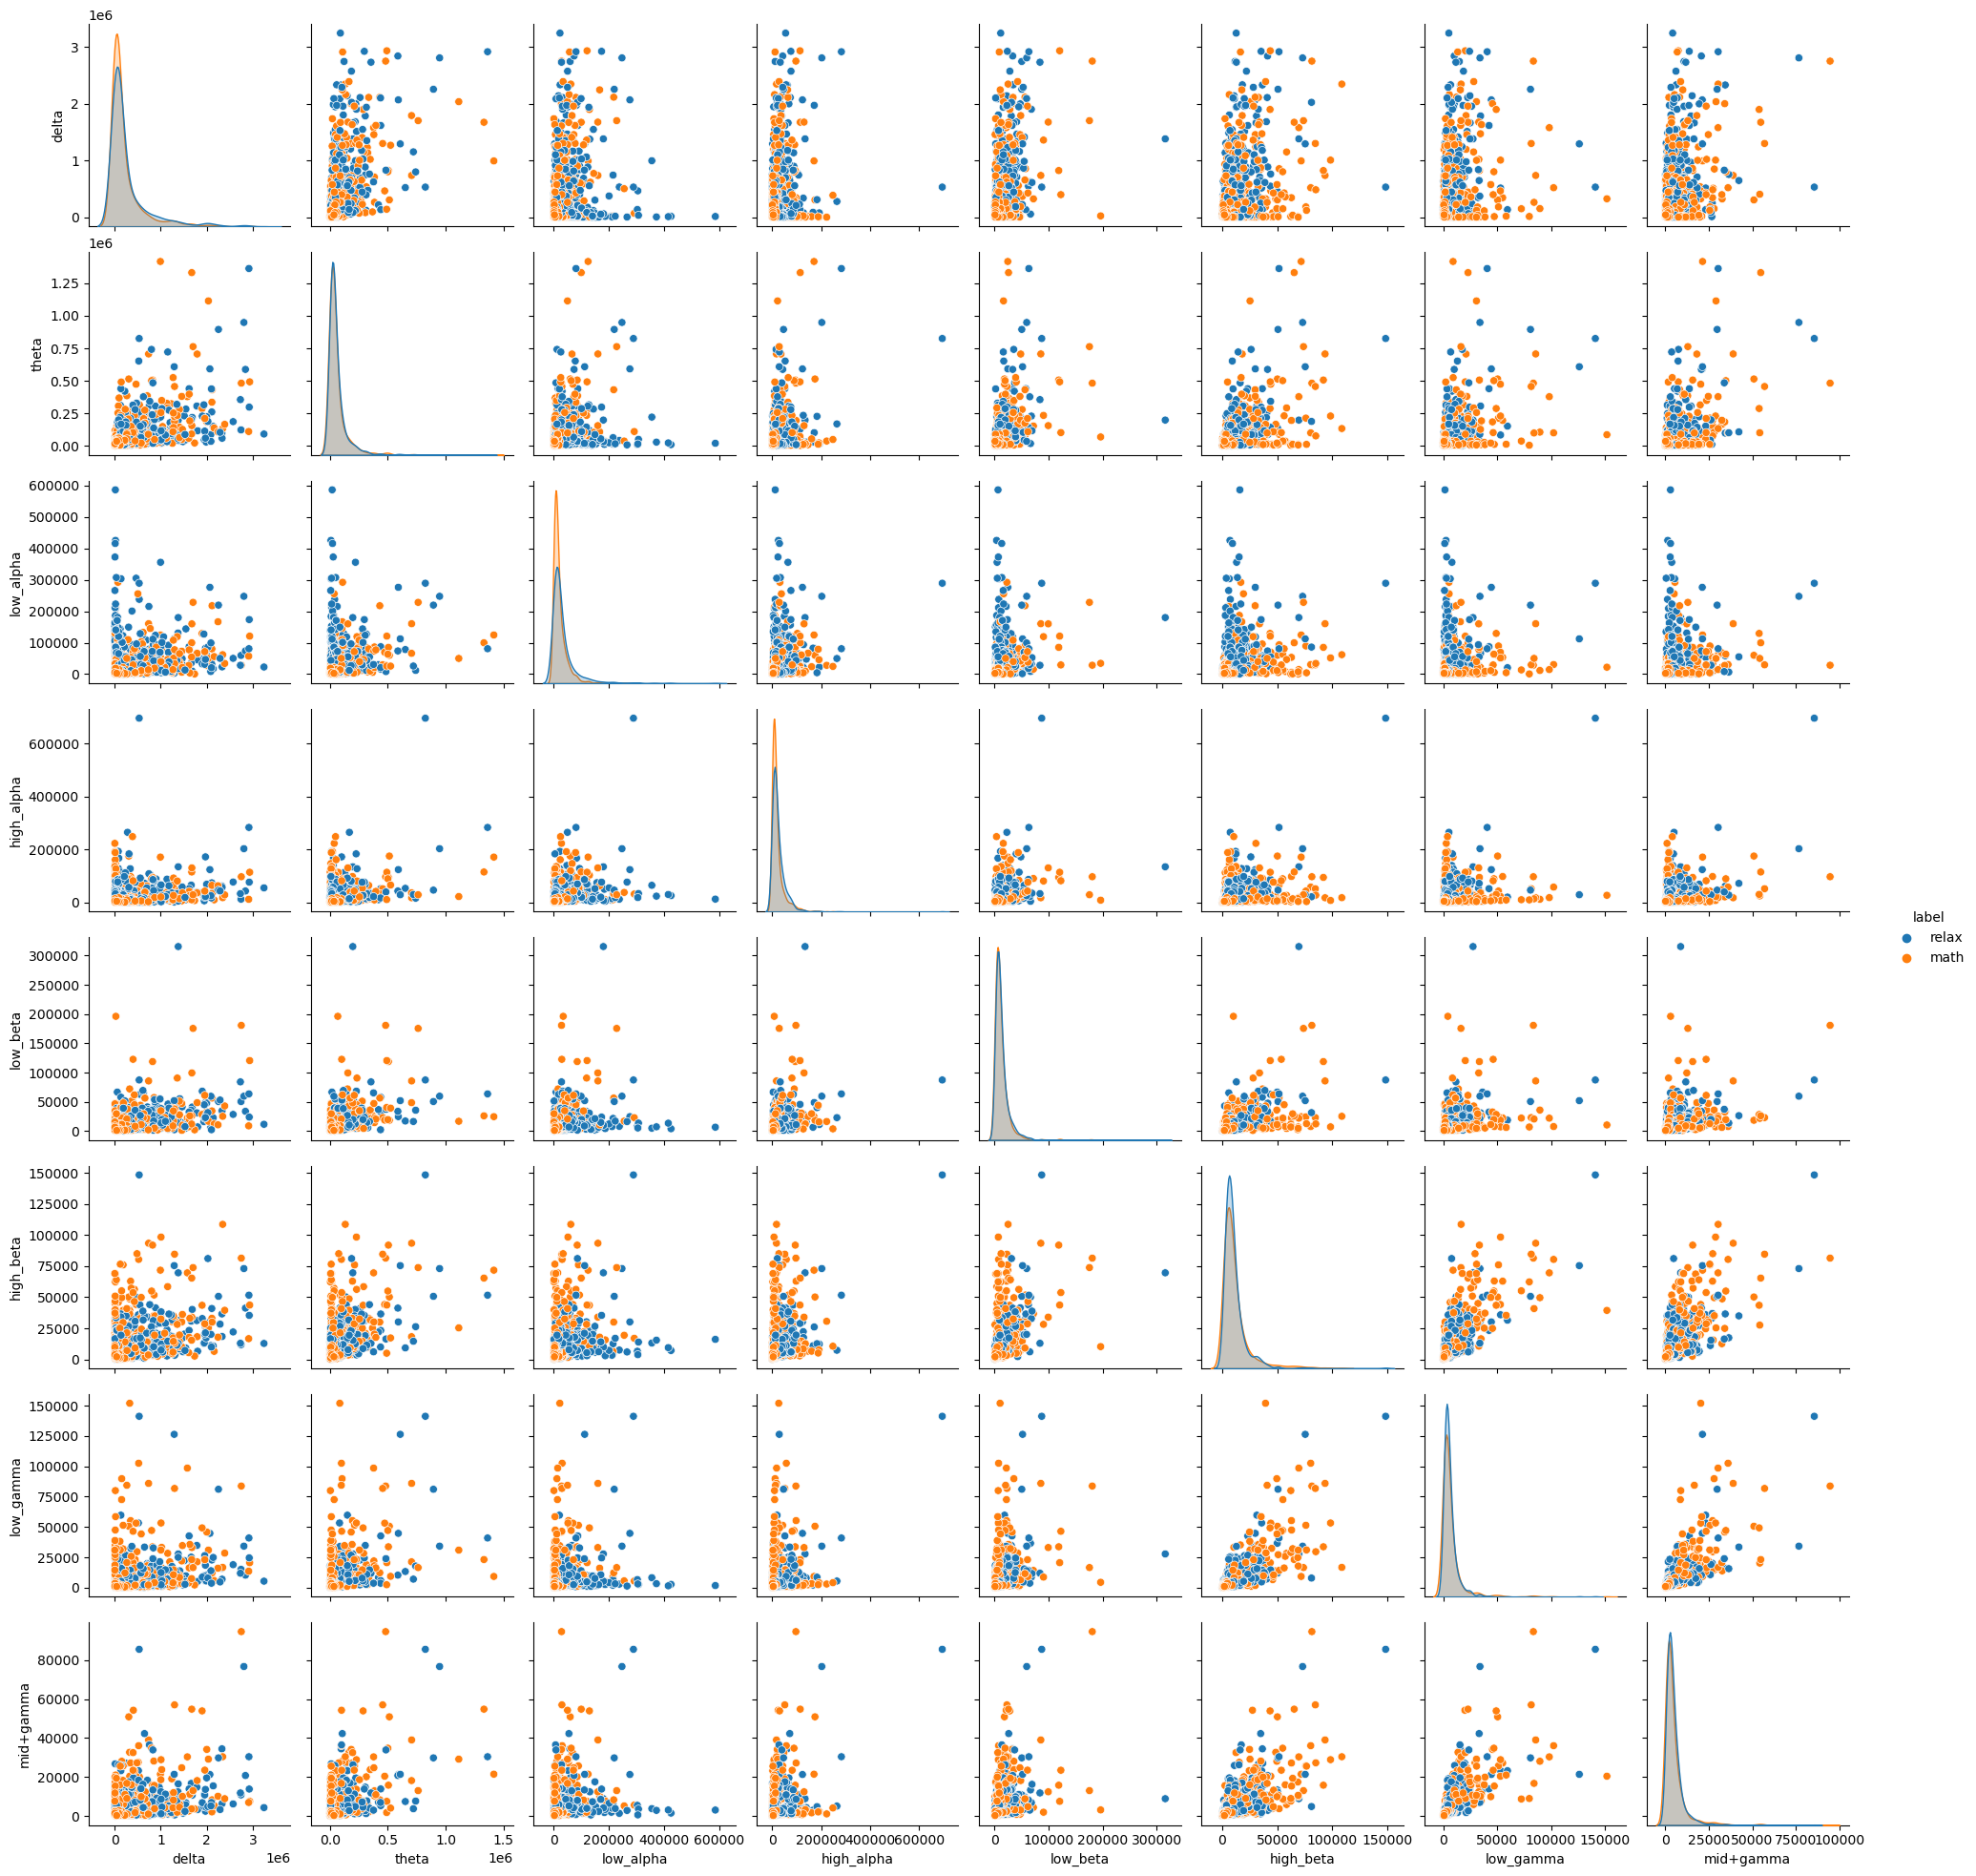

In [26]:
#divide the list into 5 features
egg_features_to_plot = pd.DataFrame(df_outer['eeg_power'].tolist())
#rename the columns
egg_features_to_plot.columns = ['delta','theta','low_alpha','high_alpha','low_beta','high_beta','low_gamma','mid+gamma']
#merge the columns with the label column.
sns.pairplot(pd.concat([egg_features_to_plot, df_outer['label'].reset_index(drop=True)], axis = 1), hue = 'label')

array([<Axes: ylabel='browser_latency'>], dtype=object)

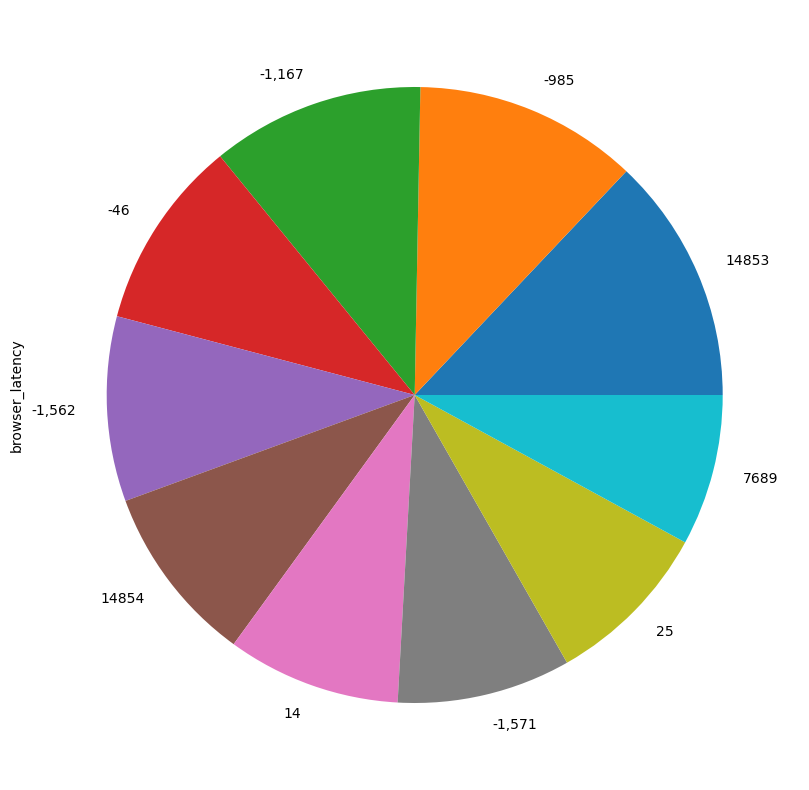

In [27]:
df_outer.browser_latency.value_counts().to_frame().iloc[0:10].plot(kind='pie', subplots=True, legend=False, figsize=(15, 10))

In [28]:
df_outer = df_outer.assign(eeg_power=df['eeg_power'])

FEATURES ENGINEERING____

In [29]:
#replace the , inside each sample in browser_latency with .
df_outer.loc[:,'browser_latency'] = df_outer.browser_latency.apply(lambda x: x.replace(',','.')).copy()
#convert the datatype of browser_latency to float32
df_outer = df_outer.astype({'browser_latency': 'float32'})

In [30]:
df_outer[['Seen video before?','Chosen color','Saw icons?','Gender','Wear contacts','label']] = df_outer[['Seen video before?','Chosen color','Saw icons?','Gender','Wear contacts','label']].astype('category')

In [31]:
#convert them to dummy encoded data.
OHE_data = pd.get_dummies(df_outer.iloc[:,-6:], columns=['Session','Seen video before?','Chosen color','Saw icons?','Gender','Wear contacts'])

In [32]:
OHE_data

,Session_1,Session_2,Seen video before?_n,Seen video before?_y,Chosen color_b,Chosen color_g,Chosen color_r,Chosen color_y,Saw icons?_both,Saw icons?_n,Saw icons?_smiley,Saw icons?_star,Gender_f,Gender_m,Wear contacts_n,Wear contacts_y
1157,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
1158,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
1159,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
1160,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
1161,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29705,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0
29706,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0
29707,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0
29708,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0


In [33]:
#frop the old features.
df_outer = df_outer.drop(['Session','Seen video before?','Chosen color','Saw icons?','Gender','Wear contacts'], axis = 1)
#append the new encoded features to the data frame.
df_outer = pd.concat([df_outer, OHE_data], axis = 1)

In [34]:
#store the labels to the new variable.
df_output = df_outer['label']
#drop them from the original dataframe.
df_outer = df_outer.drop(['label'],axis=1)
#convert their values to 0 and 1.
df_output = df_output.map(dict(relax=0, math=1))
df_output

1157     0
1158     0
1159     0
1160     0
1161     0
        ..
29705    1
29706    1
29707    1
29708    1
29709    1
Name: label, Length: 1870, dtype: category
Categories (2, int64): [1, 0]

In [35]:
df_outer.reset_index(drop=True, inplace=True)
eeg_features.reset_index(drop=True, inplace=True)
#concat median features with the main dataframe.
df_outer = pd.concat([df_outer, eeg_features], axis=1) # concatenate the create columns
df_outer = df_outer.rename(columns = {0: 'egg features median'})

NameError: name 'eeg_features' is not defined

In [36]:
print(df['eeg_power'].shape)  # Check the shape of the eeg_power column


(30013,)


HYBRID WAVELET + FOURIER

In [37]:
import numpy as np
import pandas as pd
import pywt
from scipy.fft import fft
from scipy.interpolate import interp1d
import ast
import itertools

# Wavelet Transform Function (unchanged)
def wavelet_transform(vector, wavelet='db4', max_level=4):
    '''Apply Wavelet Transform on a vector of raw EEG data with dynamic level selection'''
    level = min(max_level, pywt.dwt_max_level(len(vector), wavelet))
    coeffs = pywt.wavedec(vector, wavelet, level=level)
    ps = np.concatenate([np.abs(c)**2 for c in coeffs])
    return ps[:len(ps)//2]  # Return only half spectrum as done in Fourier

# Fourier Transform Function
def fourier_transform(vector):
    '''Apply Fourier Transform on a vector of EEG data'''
    # Apply Fast Fourier Transform (FFT)
    fft_result = np.abs(fft(vector)) ** 2  # Power spectrum (magnitude squared)
    return fft_result[:len(fft_result)//2]  # Return half spectrum (symmetry)

# Binned Spectra Function (unchanged)
def binned_spectra(pspectra, n):
    '''Compress an array of power spectra (from wavelet + fourier) into vectors of length n'''
    l = len(pspectra)
    array = np.zeros([l, n])
    
    for i, ps in enumerate(pspectra):
        max_len = len(ps)
        x = np.arange(1, max_len + 1)
        
        if max_len < n:
            f = interp1d(x, ps, bounds_error=False, fill_value="extrapolate")
            x_new = np.linspace(1, max_len, n)
        else:
            f = interp1d(x, ps)
            x_new = np.arange(1, n + 1)
        
        array[i] = f(x_new)
    
    index = np.argwhere(array[:, 0] == -1)
    array = np.delete(array, index, 0)
    return array

# Hybrid Feature Vector (Wavelet + Fourier)
def feature_vector_wavelet_fourier(readings, bins=200):
    '''Create hybrid feature vector using Wavelet and Fourier Transform'''
    wavelet_ps = list(map(wavelet_transform, readings))  # Wavelet power spectra
    fourier_ps = list(map(fourier_transform, readings))  # Fourier power spectra
    
    # Concatenate Wavelet and Fourier features
    hybrid_ps = [np.concatenate((w, f)) for w, f in zip(wavelet_ps, fourier_ps)]
    
    # Bin the combined power spectrum
    binned = binned_spectra(hybrid_ps, bins)
    return np.log10(np.mean(binned, 0))

# Grouping Function (unchanged)
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

# Feature Extraction using Hybrid Method (Wavelet + Fourier)
def vectors_wavelet_fourier(df):
    # Convert 'eeg_power' column from string to list of floats
    df['eeg_power'] = df['eeg_power'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    return [feature_vector_wavelet_fourier(group) for group in list(grouper(1, df['eeg_power'].tolist()))]

# Example usage:
# Assuming df_outer contains your data with 'eeg_power' as one of the columns
raws_values = np.array(vectors_wavelet_fourier(df_outer))  # Apply hybrid feature extraction to df_outer
raws_values_median = np.median(raws_values, axis=0)  # Take the median across all features

# Use the summary approach, storing the median of all features in a single column
raws_values_median_summary = np.median(raws_values_median)  # Single value
raw_features = pd.DataFrame([[raws_values_median_summary]], columns=['raws_values_median'])

# The 'raw_features' DataFrame will contain a single row and a single column ('raws_values_median')


MODEL______________GAN

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_outer.values, 
    df_output.values, 
    stratify=df_output, 
    shuffle=True, 
    train_size=0.8, 
    random_state=1
)
X_train


array([[25794, 6, '2015-05-09 23:32:59.500', ..., 1, 1, 0],
       [18315, 27, '2015-05-09 23:44:40.195', ..., 1, 1, 0],
       [10895, 18, '2015-05-09 23:44:48.706', ..., 1, 1, 0],
       ...,
       [8700, 16, '2015-05-09 23:44:09.295', ..., 1, 1, 0],
       [17758, 26, '2015-05-09 23:44:04.306', ..., 1, 1, 0],
       [25842, 6, '2015-05-09 23:33:47.493', ..., 1, 1, 0]], dtype=object)

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the input shape (assuming the preprocessed EEG data has 200 features per sample)
eeg_data_shape = (200,)  # Shape of the EEG feature vector

# Build the generator model
def build_generator(noise_dim, output_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=noise_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(output_dim, activation='tanh'))
    return model

# Build the discriminator model
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_shape=(input_dim,)))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (real or fake)
    return model

# Define the GAN
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Set dimensions
noise_dim = 100  # Latent space dimension
output_dim = eeg_data_shape[0]  # EEG feature vector size

# Build the generator and discriminator
generator = build_generator(noise_dim, output_dim)
discriminator = build_discriminator(output_dim)

# Compile the discriminator
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Freeze the discriminator when training the generator
discriminator.trainable = False

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Prepare data (real data)
# X_train is the EEG feature data with a shape of (samples, 200)
X_train = raws_values  # Assuming 'raws_values' contains the feature vectors from EEG data
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))  # Normalize between 0 and 1

# Training parameters
epochs = 100
batch_size = 64
half_batch = batch_size // 2

# Training loop
for epoch in range(epochs):
    # Train discriminator
    # Select a random half batch of real data
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_data = X_train[idx]

    # Generate a half batch of fake data
    noise = np.random.normal(0, 1, (half_batch, noise_dim))
    fake_data = generator.predict(noise)

    # Labels for real and fake data
    real_labels = np.ones((half_batch, 1))
    fake_labels = np.zeros((half_batch, 1))

    # Train the discriminator on real and fake data
    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator (via GAN)
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    valid_labels = np.ones((batch_size, 1))  # Generator wants the discriminator to label its generated data as real
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Output progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}] [G loss: {g_loss}]")

# After training, the discriminator will serve as a classifier
# Let's compile it again for classification (math or relax)
discriminator.trainable = True
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Now, you can use the trained discriminator to classify EEG data:
# For example:
# test_data = some_eeg_data  # EEG test data, properly preprocessed
# predictions = discriminator.predict(test_data)


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\backend\tensorflow\trainer.py:74: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.5425516366958618, acc.: 75.0] [G loss: 0.49086588621139526]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━

with split test,train

Test___

In [40]:
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, noise_dim))  # Generate new noise
    valid_y = np.ones((batch_size, 1))  # Labels for generator (pretend all are real)

    # Train the generator via GAN
    g_loss = gan.train_on_batch(noise, valid_y)

    # Print the progress
    print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}%] [G loss: {g_loss}]")

    # Save generated samples at regular intervals (for example every 10 epochs)
    if epoch % 10 == 0:
        # Generate noise
        sample_noise = np.random.normal(0, 1, (10, noise_dim))
        gen_eeg = generator.predict(sample_noise)
        # Plot or save the generated EEG-like data for visualization purposes
        print("Generated samples at epoch:", epoch)


99 [D loss: 1.2060754299163818, acc.: 50.21961331367493%] [G loss: 0.18408608436584473]


In [41]:
print(gan.input_shape)


(64, 100)


In [42]:
# Assuming gan_model is your GAN and discriminator is the discriminator model
# Compile the discriminator for classification purposes
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the discriminator model to understand the input shape
discriminator.summary()

# Prepare test_data (ensure it has the correct number of features)
# For example, if you have EEG data, it should be preprocessed to match the input shape
# Let's assume you want to reshape your test_data to have the correct shape
# test_data should have shape (number_of_samples, 200)
# For demonstration, let's create a random test data with 200 features
# If your actual test data is not of shape (1, 200), you need to adjust it
test_data = np.random.rand(1, 200)  # Replace this with your actual EEG data

# Predicting relaxation status using the discriminator
prediction = discriminator.predict(test_data)  # test_data should now be correctly formatted

# Setting a threshold to interpret the discriminator’s output
# Assuming 0 = not relaxed, 1 = relaxed; threshold is typically 0.5 for binary decisions
if prediction[0][0] >= 0.5:  # Use the appropriate index for your output
    print("The person is relaxed.")
else:
    print("The person is doing maths.")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 512)                 │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 234,497 (916.00 KB)

 Trainable params: 234,497 (916.00 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The person is relaxed.


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming gan_model is your GAN and discriminator is the discriminator model
# Compile the discriminator for classification purposes
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the discriminator model to understand the input shape
discriminator.summary()

# Prepare a test dataset (example)
# Let's assume we have 100 samples with 200 features and binary labels (0 or 1)
# Replace this with your actual EEG test data and corresponding labels
X_test = np.random.rand(100, 200)  # Example features
y_test = np.random.randint(0, 2, size=(100,))  # Example labels (0 or 1)

# Evaluate the discriminator on the test dataset
loss, accuracy = discriminator.evaluate(X_test, y_test, verbose=0)  # verbose=0 to suppress output

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 512)                 │         102,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 234,497 (916.00 KB)

 Trainable params: 234,497 (916.00 KB)

 Non-trainable params: 0 (0.00 B)

Test accuracy: 52.00%


--------------------------------------------------- GAN NEW

In [50]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import random as rnd

# Enhanced GAN Generator model with more layers and BatchNorm
def create_generator():
    generator = Sequential()
    generator.add(Dense(512, input_dim=100))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))
    
    generator.add(Dense(1024))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))
    
    generator.add(Dense(2048))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))
    
    generator.add(Dense(100, activation='tanh'))
    return generator

generator = create_generator()
generator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6))

# Function to generate synthetic EEG data using GAN
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    synthetic_data = generator.predict(noise)
    return synthetic_data

# Data processing functions
def filterSyntheticEEG(data):
    return data  # Placeholder for actual EEG filtering

def baselineCorrect(data):
    return data  # Placeholder for baseline correction

# Set option for synthetic data
syntheticDataOptions = [1]

# Sample EEG data
X_train = np.random.randn(1000, 100)
Y_train = np.random.randint(0, 2, 1000)

# Generate and integrate synthetic data
for addSyntheticData in syntheticDataOptions:
    if addSyntheticData:
        num_synthetic_samples = int(len(X_train) * 0.75)
        synthetic_data = generate_synthetic_data(generator, num_synthetic_samples)
        filtered_synthetic_data = filterSyntheticEEG(synthetic_data)
        baselined_synthetic_data = baselineCorrect(filtered_synthetic_data)
        
        Y_train = np.concatenate((Y_train, np.zeros(num_synthetic_samples)))
        X_train = np.concatenate((X_train, baselined_synthetic_data), axis=0)
        
        trainShuffle = rnd.sample(range(len(X_train)), len(X_train))
        X_train = X_train[trainShuffle, :]
        Y_train = Y_train[trainShuffle]

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Improved classifier model with L2 regularization and increased layer count
from tensorflow.keras.regularizers import l2

def create_classifier(input_shape):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_shape, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    return model

classifier = create_classifier(X_train.shape[1])
classifier.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

# Early stopping for stability
early_stopping = EarlyStopping(monitor='val_accuracy', patience=100, restore_best_weights=True)

# Train with a larger batch size and increased epochs
history = classifier.fit(X_train, Y_train, epochs=200, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
X_test = scaler.transform(X_test)
test_loss, test_acc = classifier.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predictions and classification report
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(Y_test, Y_pred))

C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/200


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4709 - loss: 14.4804 - val_accuracy: 0.5179 - val_loss: 14.4359
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4851 - loss: 14.4498 - val_accuracy: 0.5536 - val_loss: 14.4131
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4665 - loss: 14.4379 - val_accuracy: 0.5786 - val_loss: 14.3908
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5056 - loss: 14.4086 - val_accuracy: 0.6107 - val_loss: 14.3691
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5301 - loss: 14.3884 - val_accuracy: 0.6536 - val_loss: 14.3475
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5018 - loss: 14.3805 - val_accuracy: 0.6750 - val_loss: 14.3264
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5437 - loss: 14.3495 - val_accuracy: 0.6857 - val_loss: 14.3053
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5574 - loss: 14.3246 - val_accuracy: 0.7143 - val_lo